In [203]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [204]:
#np.log() will transform the variable, and np.exp() will reverse the transformation.

In [205]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [206]:
print(train.shape)
print(test.shape)


(1460, 81)
(1459, 80)


In [207]:
train.MSSubClass = train.MSSubClass.astype('object')
train.MoSold = train.MoSold.astype('object')
train.YrSold = train.YrSold.astype('object')
test.MSSubClass = test.MSSubClass.astype('object')
test.MoSold = test.MoSold.astype('object')
test.YrSold = test.YrSold.astype('object')

In [208]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)

In [209]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew = 1.8828757597682129


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

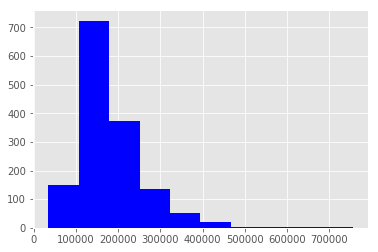

In [210]:
print ("Skew =", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')

In [211]:
train['log_SalePrice'] = np.log(train.SalePrice)
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216


In [212]:
numeric_cols = train.select_dtypes(np.number)
numeric_cols.shape
numeric_cols.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,log_SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,208500,12.247694
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,181500,12.109011
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,223500,12.317167
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,140000,11.849398
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,250000,12.429216


Skew = 0.12133506220520406


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

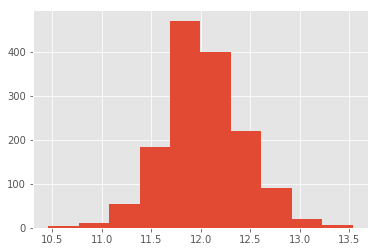

In [213]:
print("Skew =", train.log_SalePrice.skew())
plt.hist(train.log_SalePrice)

In [214]:
numeric_cols.dtypes

Id                 int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
SalePrice          int64
log_SalePrice    float64
dtype: object

In [215]:
numeric_cols.corr(method='pearson')['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
log_SalePrice    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [216]:
print(train.shape)
print(test.shape)

(1460, 82)
(1459, 80)


In [217]:
train.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object


## OverallQual

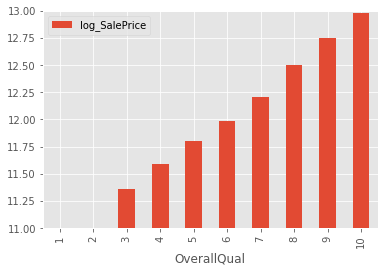

In [218]:
pivot = train.pivot_table(index='OverallQual', values = 'log_SalePrice', aggfunc=np.median)
pivot.plot(kind='bar',ylim=(11,13))

## GrLivArea

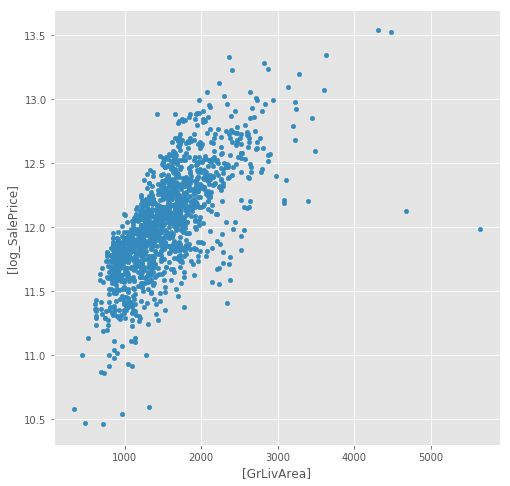

In [219]:
train.plot(x=['GrLivArea'], y=['log_SalePrice'], kind='scatter', figsize = (8,8))

In [220]:
train['GrLivArea'].sort_values(ascending=False).head(5)

1298    5642
523     4676
1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

In [221]:
#removing 2 outliers
train = train[train['GrLivArea'] < 4670]

In [222]:
print(train.shape)

(1458, 82)


## GarageCars

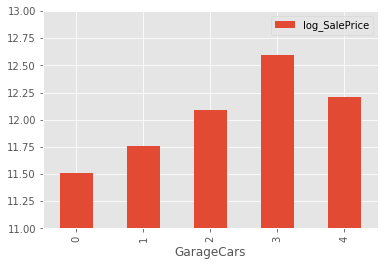

In [223]:
pivot = train.pivot_table(index='GarageCars', values = 'log_SalePrice', aggfunc=np.median)
pivot.plot(kind='bar',ylim=(11,13))

In [224]:
print(train.shape)
print(test.shape)

(1458, 82)
(1459, 80)


## GarageArea

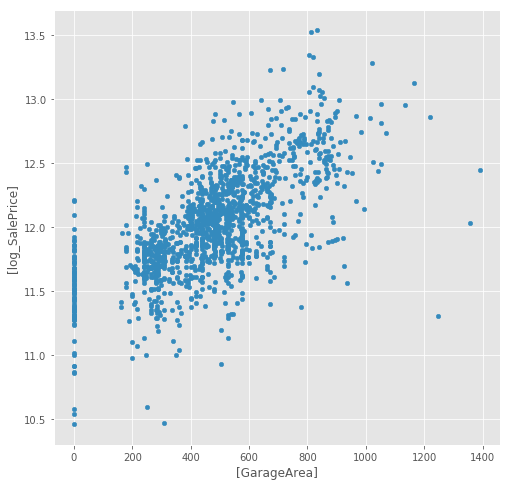

In [225]:
train.plot(x=['GarageArea'], y=['log_SalePrice'], kind='scatter', figsize = (8,8))

In [226]:
train['GarageArea'].sort_values(ascending=False).head(5)

581     1390
1190    1356
1061    1248
825     1220
178     1166
Name: GarageArea, dtype: int64

In [227]:
#removing 3 outliers
train = train[train['GarageArea'] < 1247]
train.shape

(1455, 82)

## TotalBsmtSF

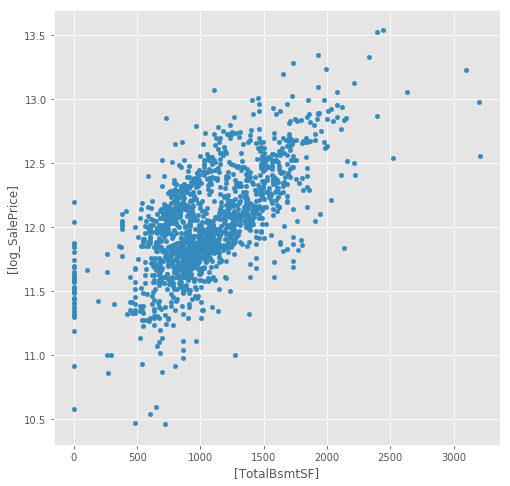

In [228]:
train.plot(x=['TotalBsmtSF'], y=['log_SalePrice'], kind='scatter', figsize = (8,8))

## 1stFlrSF

In [229]:
print(train.shape)
print(test.shape)

(1455, 82)
(1459, 80)


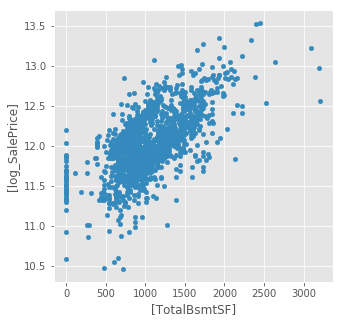

In [230]:
train.plot(x=['TotalBsmtSF'], y=['log_SalePrice'], kind='scatter', figsize = (5,5))

## FullBath

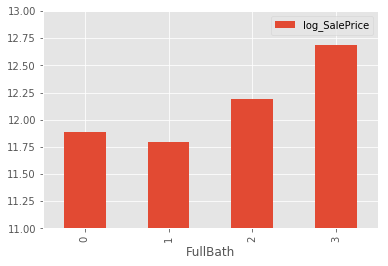

In [231]:
train.pivot_table(index='FullBath', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,13))

## TotRmsAbvGrd

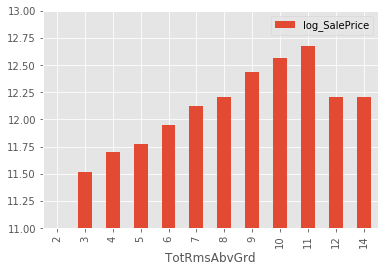

In [232]:
train.pivot_table(index='TotRmsAbvGrd', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,13))

## YearBuilt

In [233]:
print(train.shape)

(1455, 82)


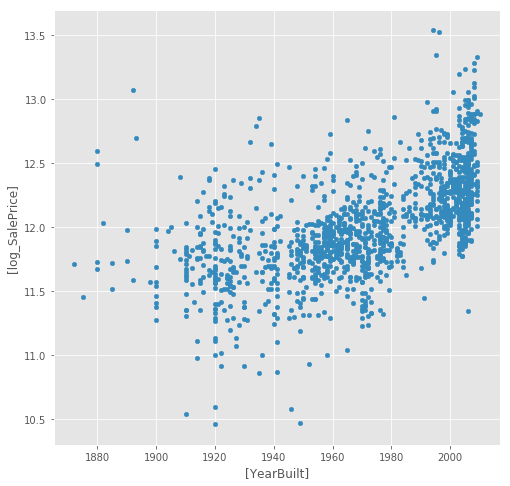

In [234]:
train.plot(x=['YearBuilt'], 
                  y=['log_SalePrice'], 
                  kind='scatter', 
                  figsize = (8,8))

## YearRemodAdd

In [235]:
print(train.shape)

(1455, 82)


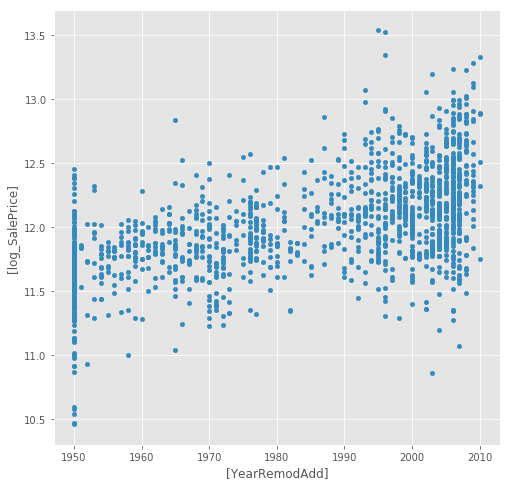

In [236]:
train.plot(x=['YearRemodAdd'], 
                  y=['log_SalePrice'], 
                  kind='scatter', 
                  figsize = (8,8))

## GarageYrBlt

In [237]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(value=train.GarageYrBlt.mean())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(value=train.GarageYrBlt.mean())

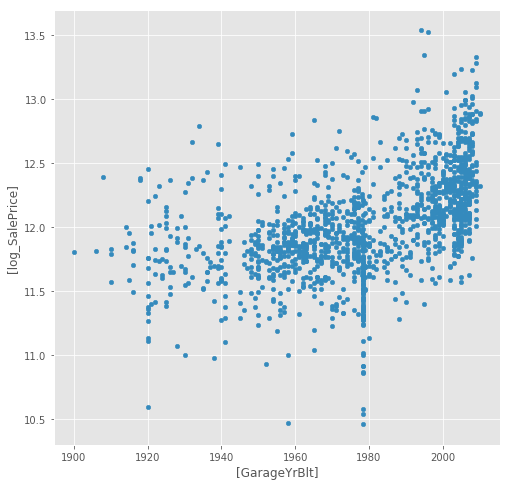

In [238]:
train.plot(x=['GarageYrBlt'], 
                  y=['log_SalePrice'], 
                  kind='scatter', 
                  figsize = (8,8))

In [239]:
print(train.shape)
print(test.shape)

(1455, 82)
(1459, 80)


## MasVnrArea

In [240]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(value=train.MasVnrArea.mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(value=test.MasVnrArea.mean())

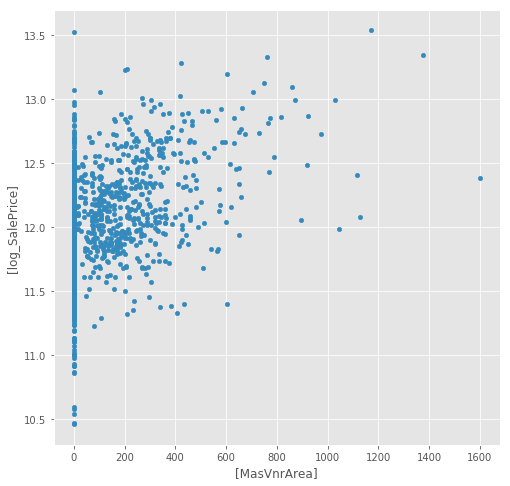

In [241]:
train.plot(x=['MasVnrArea'], y=['log_SalePrice'], kind='scatter', figsize = (8,8))

In [242]:
print(train.shape)
print(test.shape)

(1455, 82)
(1459, 80)


## Fireplaces

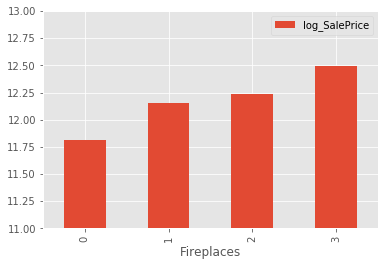

In [243]:
train.pivot_table(index='Fireplaces', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,13))

## BsmtFinSF1

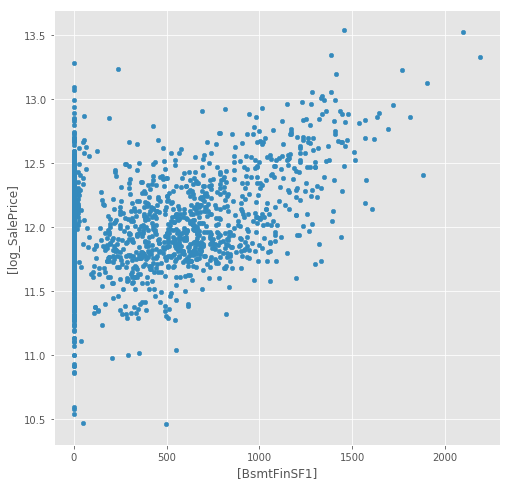

In [244]:
train.plot(x=['BsmtFinSF1'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (8,8))

## LotFrontage

In [245]:
train['LotFrontage'] = train['LotFrontage'].fillna(value=train.LotFrontage.mean())
train = train[train['LotFrontage'] < 200]
test['LotFrontage'] = test['LotFrontage'].fillna(value=test.LotFrontage.mean())

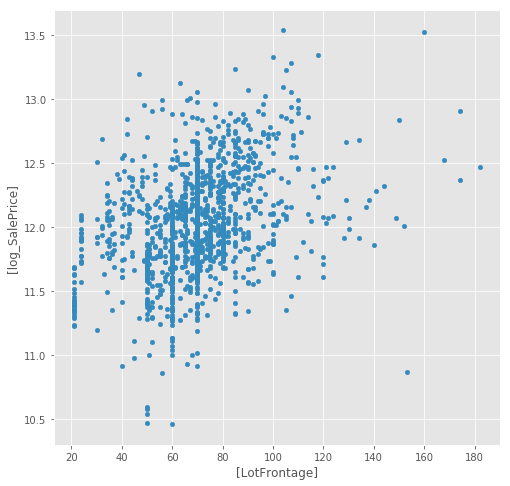

In [246]:
train.plot(x=['LotFrontage'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (8,8))

In [247]:
train.shape
test.shape

(1459, 80)

## WoodDeckSF

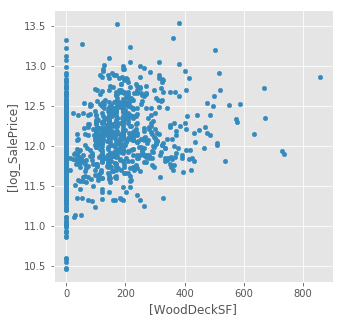

In [248]:
train.plot(x=['WoodDeckSF'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (5,5))

## 2ndFlrSF

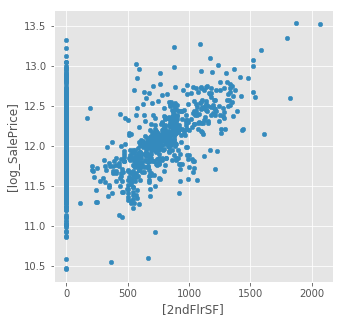

In [249]:
train.plot(x=['2ndFlrSF'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (5,5))

## OpenPorchSF

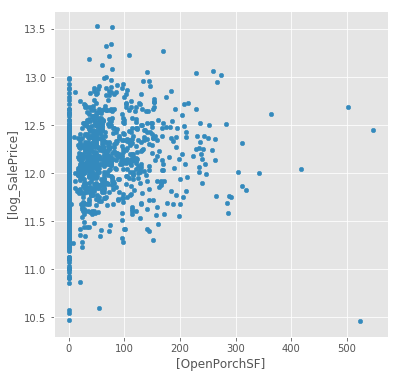

In [250]:
train.plot(x=['OpenPorchSF'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (6,6))

In [251]:
#Removing 3 outlier
train = train[train['OpenPorchSF'] < 500]

In [252]:
train.shape

(1451, 82)

## HalfBath

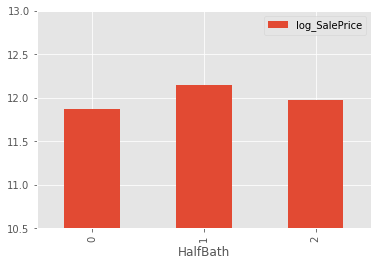

In [253]:
train.pivot_table(index='HalfBath', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(10.5,13))

## LotArea

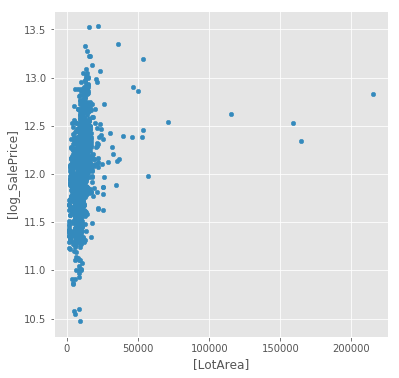

In [254]:
train.plot(x=['LotArea'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (6,6))

In [255]:
#Removing 3 outliers
train = train[train['LotArea'] < 150000]

In [256]:
train.shape

(1448, 82)

## BsmtFullBath

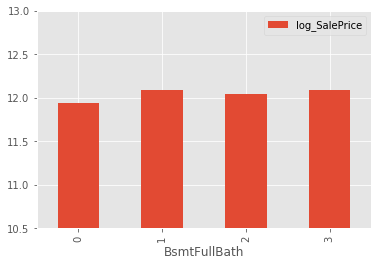

In [257]:
train.pivot_table(index='BsmtFullBath', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(10.5,13))

## BsmtHalfBath

In [258]:
train=train.drop('BsmtHalfBath', axis=1)
test=test.drop('BsmtHalfBath', axis=1)
print(train.shape)
print(test.shape)

(1448, 81)
(1459, 79)


## BsmtUnfSF

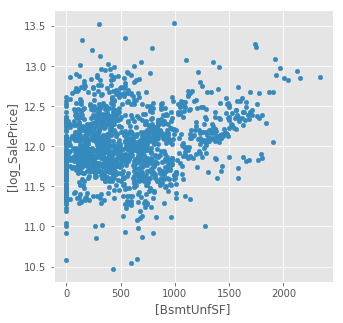

In [259]:
train.plot(x=['BsmtUnfSF'], y=['log_SalePrice'], 
                  kind='scatter', figsize = (5,5))

## BedroomAbvGr

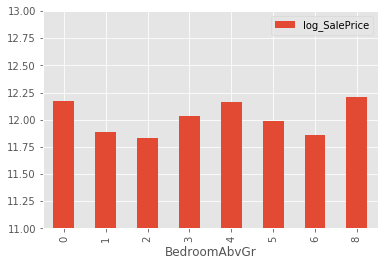

In [260]:
train.pivot_table(index='BedroomAbvGr', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,13))

## ScreenPorch

In [261]:
train = train.drop('ScreenPorch', axis=1)
test = test.drop('ScreenPorch', axis=1)

## PoolArea

In [262]:
train = train.drop('PoolArea', axis=1)
test = test.drop('PoolArea', axis=1)

## 3SsnPorch

In [263]:
train = train.drop('3SsnPorch', axis=1)
test = test.drop('3SsnPorch', axis=1)

## BsmtFinSF2

In [264]:
train=train.drop('BsmtFinSF2',axis=1)
test=test.drop('BsmtFinSF2',axis=1)

## MiscVal

In [265]:
train = train.drop('MiscVal', axis=1)
test = test.drop('MiscVal', axis=1)

## LowQualFinSF

In [266]:
train=train.drop('LowQualFinSF',axis=1)
test=test.drop('LowQualFinSF',axis=1)

## YrSold

## OverallCond

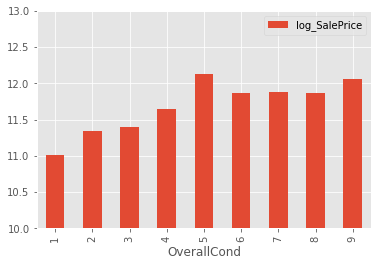

In [267]:
train.pivot_table(index='OverallCond', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(10,13))

## MSSubClass

In [268]:
train.shape

(1448, 75)

## EnclosedPorch

In [269]:
train=train.drop('EnclosedPorch', axis=1)
test=test.drop('EnclosedPorch', axis=1)

## KitchenAbvGr

In [270]:
train=train.drop('KitchenAbvGr', axis=1)
test=test.drop('KitchenAbvGr', axis=1)

## Null Values

In [271]:
null_vals = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
null_vals

,0
PoolQC,1442
MiscFeature,1398
Alley,1358
Fence,1169
FireplaceQu,688
GarageQual,80
GarageCond,80
GarageType,80
GarageFinish,80
BsmtExposure,38


In [272]:
print(train.shape)
print(test.shape)


(1448, 73)
(1459, 71)


In [273]:
%store train
%store null_vals
%store test

Stored 'train' (DataFrame)
Stored 'null_vals' (DataFrame)
Stored 'test' (DataFrame)
